In [201]:
###Simplification of the relaxation matrix by just keeping relaxation channels whose jump operators are products of Z

import sys
sys.path.append('./utils/')
import numpy as np
import scipy.io as spio
from scipy.linalg import expm
from matplotlib import pyplot as plt
import sys

from analytical_fit import ZZ_RelChanMatRep, GetRelManySpins, Kite_relMat
from basis_utils import read_spinach_info, build_list_ISTs, NormalizeBasis, MatRepLib,Sz,S_plus,S_minus

import pickle

from scipy.io import savemat
import scipy
import openfermion as of


# The DFG case

In [2]:
loadMat = spio.loadmat('./data/DFG_kite.mat',squeeze_me=True)

R = loadMat['p']['R'].item()
H = loadMat['p']['H'].item()

In [207]:
of.commutator(Sz(0),S_minus(0))

(-0.5+0j) [X0] +
0.5j [Y0]

In [208]:
S_minus(0)

0.5 [X0] +
-0.5j [Y0]

In [173]:
eigs_H, eigvects_H = np.linalg.eig(H)

In [174]:
eigs_H

array([ 2.47005060e+04,  2.32047102e+04, -1.29873299e+04, -1.44831257e+04,
        3.76878359e+04,  1.44831257e+04,  1.29873299e+04, -3.76878359e+04,
       -2.47005060e+04, -2.32047102e+04,  1.04283872e-12,  3.41321426e-13,
        0.00000000e+00, -1.02173803e+04,  0.00000000e+00,  1.02173803e+04])

In [178]:
###Understanding how the initial state is decomposed inot a linear combination of eigenstates of the H0 super-operator...

H0_overlaps = []

for i in range(16):
    H0_overlaps.append(np.dot(eigvects_H[:,i].conj().T,Init_state))



In [180]:
eigvects_H[:,10]

array([ 0.00000000e+00,  3.39243228e-17, -9.20710465e-01,  8.38052091e-18,
        2.78790076e-16,  0.00000000e+00,  2.18809270e-16,  2.60013720e-02,
        3.88510099e-01,  7.94840789e-17,  0.00000000e+00, -2.27466230e-17,
        3.37242897e-18,  2.60013720e-02,  1.06139926e-16,  0.00000000e+00])

In [181]:
eigvects_H[:,11]

array([ 0.00000000e+00, -2.53620027e-17,  3.64307754e-01, -3.31601395e-18,
       -1.93181514e-16,  0.00000000e+00, -1.20741208e-16, -2.57164854e-02,
       -9.30568206e-01,  9.14518894e-17,  0.00000000e+00,  9.00040939e-18,
       -1.33440649e-18, -2.57164854e-02, -4.19975653e-17,  0.00000000e+00])

In [182]:
eigs_H[10], eigs_H[11]

(1.042838721938493e-12, 3.413214256448922e-13)

In [179]:
H0_overlaps

[-2.5975758338089386e-19,
 2.812288410759228e-19,
 1.416601204280705e-17,
 1.3084465444292522e-17,
 -1.1102230246251565e-16,
 -1.8645798141018722e-16,
 2.0875716306032211e-16,
 -1.8735013540549517e-16,
 2.0144630716682985e-16,
 1.028004183413164e-16,
 -0.5322003661019044,
 -0.5662604522039044,
 0.0,
 0.0,
 0.0,
 0.0]

In [165]:
eigvects_H[14,:]

array([-7.06967481e-01,  7.06967481e-01,  1.40349764e-02,  1.40349764e-02,
       -3.11392446e-19, -6.00132235e-17, -5.65656542e-17,  5.76586224e-18,
        3.45942617e-18, -2.39526193e-18,  1.06139926e-16, -4.19975653e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [143]:
Normbasis[5]

(0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
0.25j [Y0 X1] +
(-0.25+0j) [Y0 Y1]

In [145]:
Init_state

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [141]:
eigvects_H[2,:]

array([-3.06421983e-19,  3.23167979e-19,  1.41339859e-17,  1.30856158e-17,
       -1.98445439e-02, -1.50239855e-16,  1.67183506e-16,  1.98445439e-02,
        1.21431136e-16,  3.26387120e-16, -9.20710465e-01,  3.64307754e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [217]:
###Analytically generated ZZ-terms,
text="""1      (0,0)   (0,0)   
  2      (0,0)   (1,1)   
  3      (0,0)   (1,0)   
  4      (0,0)   (1,-1)  
  5      (1,1)   (0,0)   
  6      (1,1)   (1,1)   
  7      (1,1)   (1,0)   
  8      (1,1)   (1,-1)  
  9      (1,0)   (0,0)   
  10     (1,0)   (1,1)   
  11     (1,0)   (1,0)   
  12     (1,0)   (1,-1)  
  13     (1,-1)  (0,0)   
  14     (1,-1)  (1,1)   
  15     (1,-1)  (1,0)   
  16     (1,-1)  (1,-1)  
"""


gammaF = 251814800
coord1 = np.array([-0.0551,-1.2087,-1.6523])*1e-10
coord2 = np.array([-0.8604 ,-2.3200 ,-0.0624])*1e-10

coords = np.array([coord1,coord2])
w1 = -376417768.6316 
w2 = -376411775.1523 
freqs = np.array([w1,w2])

tc =  0.5255e-9
Nspins = 2 

data = read_spinach_info(text)

basis = build_list_ISTs(data)

Normbasis = NormalizeBasis(basis,n_qubits=2,checkOrth=True)

R_an = ZZ_RelChanMatRep(freqs,tc,coords,Nspins,gammaF,Normbasis)

R_kite = Kite_relMat(freqs,tc,coords,Nspins,gammaF,Normbasis)
#Kite_relMat(freqs,tc,coords,Nspins,gamma,basis)

K2,K1,K0,R_all = GetRelManySpins(2*np.pi*freqs,coords,tc,gammaF,Normbasis)

#t2_rel=34.0359

#R_an+=2*t2_rel*MatRepLib(Normbasis,Sz(0),Sz(0))
#R_an+=2*t2_rel*MatRepLib(Normbasis,Sz(1),Sz(1))



K2 type contributions finished
K1 type contributions finished
K0 type contributions finished


In [218]:
np.linalg.norm(R_all.conj().T-R_all)

0.0

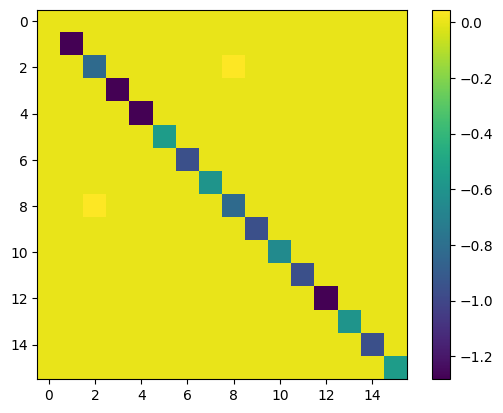

In [199]:
plt.imshow(np.real(R), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

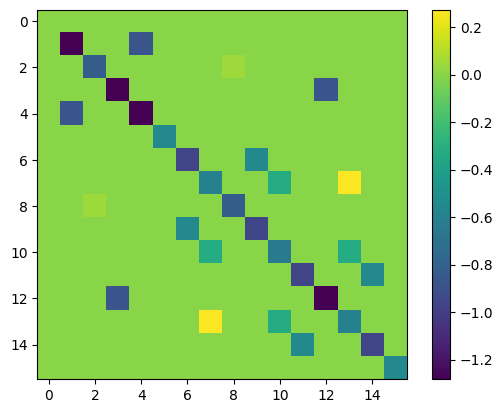

In [210]:
plt.imshow(np.real(R_all), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [215]:
diff_diag = 0.0
for i in range(16):
    diff_diag+=np.abs(R_all[i,i]-R[i,i])


In [216]:
diff_diag

0.006630741051099509

In [ ]:
R

In [111]:
L_net = -1j*H+R_all 

ws,vl,vr = scipy.linalg.eig(L_net,left=True)

In [124]:
ws

array([ 0.        +0.00000000e+00j, -0.26691882+3.76878359e+04j,
       -0.26691882-3.76878359e+04j, -1.33616911-9.66552617e-14j,
       -0.39503498-1.47203442e-16j, -3.63079331+1.61870504e-12j,
       -1.48443836+2.47005052e+04j, -1.54296839+2.32047109e+04j,
       -1.54296821-1.29873306e+04j, -1.48443818-1.44831249e+04j,
       -1.48443818+1.44831249e+04j, -1.54296821+1.29873306e+04j,
       -1.48443836-2.47005052e+04j, -1.54296839-2.32047109e+04j,
       -0.55264058+1.02173803e+04j, -0.55264058-1.02173803e+04j])

In [123]:
np.linalg.norm(L_net-vr@np.diag(ws)@vl.conj().T)

78.68929040168996

In [121]:
Rec_Lnet = np.zeros([16,16],dtype=complex)

for i in range(16):
    Rec_Lnet+=ws[i]*np.outer(vr[i,:].conj().T,vl[:,i])


In [122]:
np.linalg.norm(Rec_Lnet-L_net)

101907.48395078092

In [80]:
ws

array([ 0.        +0.00000000e+00j, -0.26691882+3.76878359e+04j,
       -0.26691882-3.76878359e+04j, -1.33616911-9.66552617e-14j,
       -0.39503498-1.47203442e-16j, -3.63079331+1.61870504e-12j,
       -1.48443836+2.47005052e+04j, -1.54296839+2.32047109e+04j,
       -1.54296821-1.29873306e+04j, -1.48443818-1.44831249e+04j,
       -1.48443818+1.44831249e+04j, -1.54296821+1.29873306e+04j,
       -1.48443836-2.47005052e+04j, -1.54296839-2.32047109e+04j,
       -0.55264058+1.02173803e+04j, -0.55264058-1.02173803e+04j])

In [169]:
L_net = -1j*H+R_all 
eigvals,eigvects=np.linalg.eig(L_net)

In [172]:
eigvals[5]

(-3.630793307265814+1.6187050439637521e-12j)

In [130]:
np.linalg.norm(eigvects@np.diag(eigvals)@np.linalg.inv(eigvects)-L_net)

7.580120037524433e-11

In [131]:
np.linalg.norm(expm(L_net)-eigvects@expm(np.diag(eigvals))@np.linalg.inv(eigvects))

2.757074298039212e-11

In [132]:
Init_state.T@eigvects

array([ 0.00000000e+00+0.00000000e+00j, -5.89805982e-17+4.99007269e-13j,
        3.46944695e-17-4.99033974e-13j,  2.91784970e-07+7.13595849e-14j,
       -2.43861110e-09-5.53051528e-16j,  1.41421356e+00-2.79587985e-13j,
        3.27273460e-16+7.93962462e-16j, -3.15074414e-17+4.09485724e-16j,
       -2.35167120e-16+1.58704478e-16j, -3.14832296e-16+1.28721225e-16j,
       -4.02326855e-17-9.50107435e-17j, -3.92283107e-17-1.01803073e-16j,
       -1.75769110e-16-3.38580436e-17j, -1.84120250e-16-4.97134810e-17j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [134]:
Normbasis[5]

(0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
0.25j [Y0 X1] +
(-0.25+0j) [Y0 Y1]

In [167]:
InvMat = np.linalg.inv(eigvects)

InvMat@Init_state




array([-8.49964415e-26-8.14216139e-32j,  1.38777878e-17+4.99028567e-13j,
       -5.55111512e-17-4.99002080e-13j,  2.91784846e-07+2.79801992e-13j,
       -2.43861001e-09-2.26615291e-15j,  1.41421356e+00+2.79587912e-13j,
       -1.31533848e-16+3.09283944e-16j, -8.19688588e-17+2.16118360e-18j,
       -2.36605752e-16-2.71423711e-17j, -2.28250717e-16+9.68363722e-17j,
        1.22192057e-16-2.37574297e-17j,  1.22391973e-16-2.75432121e-17j,
       -1.89851976e-17+4.52610312e-18j, -2.48884644e-17+2.57893939e-18j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [168]:
Normbasis[5]

(0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
0.25j [Y0 X1] +
(-0.25+0j) [Y0 Y1]

In [54]:
Normbasis[5]

(0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
0.25j [Y0 X1] +
(-0.25+0j) [Y0 Y1]

In [35]:
Init_state=np.zeros(16)
Init_state[2]=1.0
Init_state[8]=1.0

In [36]:
overlaps=[]

for i in range(16):
    overlaps.append(np.dot(eigvects[i,:].conj().T,Init_state))


In [38]:
eigvals[10]

(-0.5842908442580771+3.776420963257194e-48j)

In [39]:
eigvals

array([ 0.00000000e+00+0.00000000e+00j, -2.12164406e-17-4.46154142e-80j,
       -5.92748517e-01-1.05401313e-79j, -3.34458640e-01-9.59381424e-80j,
       -3.91782609e+00+2.16267451e-67j, -3.63079331e+00+5.85807948e-65j,
       -1.24215697e+00+4.61395529e-65j, -1.33783456e+00+8.82602430e-64j,
       -3.91782609e+00+9.28507713e-49j, -1.24215697e+00-4.70492868e-48j,
       -5.84290844e-01+3.77642096e-48j, -3.10539242e-01-1.66533454e-16j,
       -3.10539242e-01+2.18575158e-16j, -5.84290844e-01+0.00000000e+00j,
       -5.52640583e-01+0.00000000e+00j, -5.52640583e-01+0.00000000e+00j])

In [37]:
overlaps

[(1.510822172789466e-17-1.3019794013186005e-68j),
 (-0.048099772177382746-1.4510499563150645e-35j),
 (-1.2809286639983831e-16+3.1274959015861598e-49j),
 (0.7054688677542266+3.422891432342929e-50j),
 (-0.04809978069547338-1.4510502132845762e-35j),
 0j,
 (-5.589102025862627e-16+1.0634789521748782e-33j),
 (0.4082482904638629-1.8297329852329195e-51j),
 (-1.8410009772156478e-16+4.488188445168622e-49j),
 (9.624416211955242e-17-9.925803553632198e-34j),
 (0.816496580927726-4.035098047303093e-52j),
 (5.468587023676805e-17+4.253915808699514e-34j),
 (0.7054689926872059-3.659961409200579e-81j),
 (0.40824829046386296-1.7135802130298867e-51j),
 (-1.1884553489546113e-16-4.253915808699514e-34j),
 0j]

In [34]:
eigvects[:,0]

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [29]:
Normbasis[2], Normbasis[8]

((0.5+0j) [Z1], (0.5+0j) [Z0])

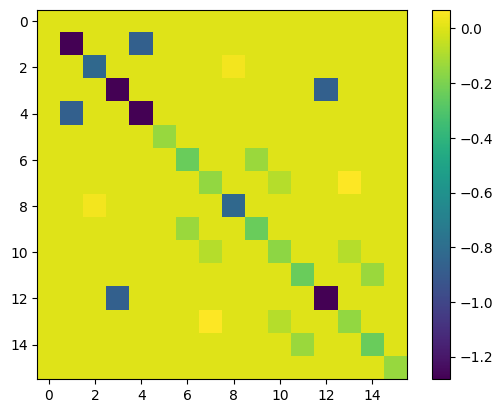

In [190]:
plt.imshow(np.real(R_all), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [186]:
R_all[15,15]

(-0.5526405828411893+0j)

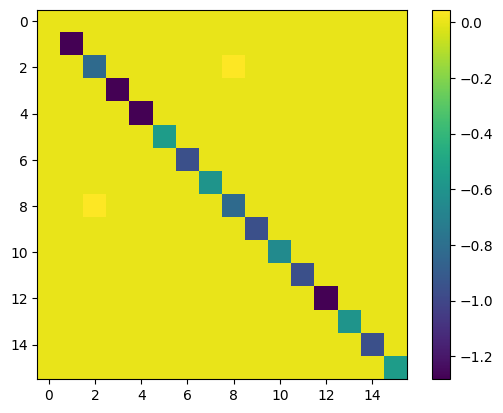

In [191]:
plt.imshow(np.real(R), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [193]:
R[15,15]

(-0.5512672356+0j)

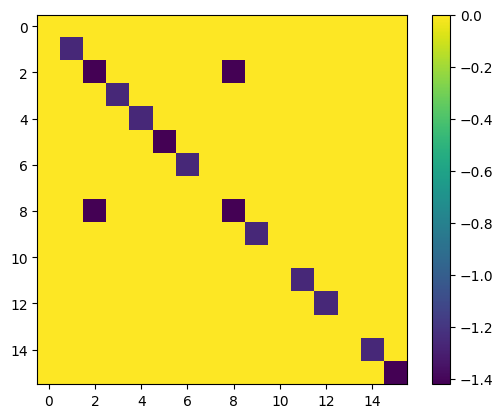

In [219]:
plt.imshow(np.real(R_kite), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

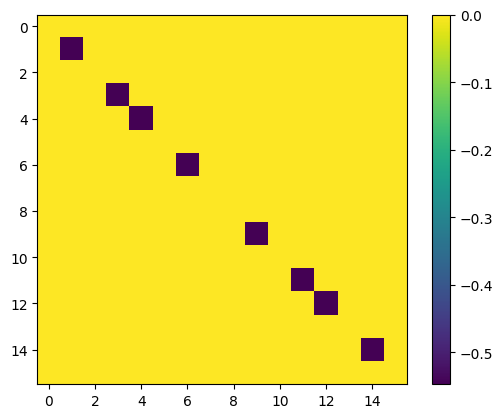

In [21]:
plt.imshow(np.real(R_an), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [24]:
Normbasis[8]

(0.5+0j) [Z0]

In [8]:
###Saving the ZZ-only relaxation matrix to test the generation of NOESY spectra...
savemat('DFG_ZZRel.mat', {'ZZRel': R_an})



In [ ]:
#Can we reproduce the spectrum by using only ZZ terms regardless of the mismatch of relaxation matrices?





In [22]:
Normbasis[7]

(-0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
-0.25j [Y0 X1] +
(-0.25-0j) [Y0 Y1]

In [21]:
Normbasis[8]*Z1Z2-Z1Z2*Normbasis[8]

0

In [17]:
Normbasis[5]

(0.25+0j) [X0 X1] +
0.25j [X0 Y1] +
0.25j [Y0 X1] +
(-0.25+0j) [Y0 Y1]

In [12]:
from openfermion import QubitOperator
Z1Z2 = QubitOperator('Z0 Z1')

In [13]:
Z1Z2*Normbasis[2]*Z1Z2-Normbasis[2]

0

In [14]:
Normbasis[2]

(0.5+0j) [Z1]

# The Alanine case

In [220]:
loadMat = spio.loadmat('./data/ALA_NOESY_withGradients_kite.mat',squeeze_me=True)

R_ala = loadMat['p']['R'].item()
H_ala = loadMat['p']['H'].item()

In [221]:
R_ala

<256x256 sparse matrix of type '<class 'numpy.complex128'>'
	with 395 stored elements in Compressed Sparse Column format>

In [12]:
import sys
sys.path.append('./utils/')
import numpy as np
import scipy.io as spio
from scipy.linalg import expm
from matplotlib import pyplot as plt
import sys

from analytical_fit import ZZ_RelChanMatRep
from basis_utils import read_spinach_info, build_list_ISTs, NormalizeBasis, MatRepLib,Sz


In [15]:
text4="""1      (0,0)   (0,0)   (0,0)   (0,0)   
  2      (0,0)   (0,0)   (0,0)   (1,1)   
  3      (0,0)   (0,0)   (0,0)   (1,0)   
  4      (0,0)   (0,0)   (0,0)   (1,-1)  
  5      (0,0)   (0,0)   (1,1)   (0,0)   
  6      (0,0)   (0,0)   (1,1)   (1,1)   
  7      (0,0)   (0,0)   (1,1)   (1,0)   
  8      (0,0)   (0,0)   (1,1)   (1,-1)  
  9      (0,0)   (0,0)   (1,0)   (0,0)   
  10     (0,0)   (0,0)   (1,0)   (1,1)   
  11     (0,0)   (0,0)   (1,0)   (1,0)   
  12     (0,0)   (0,0)   (1,0)   (1,-1)  
  13     (0,0)   (0,0)   (1,-1)  (0,0)   
  14     (0,0)   (0,0)   (1,-1)  (1,1)   
  15     (0,0)   (0,0)   (1,-1)  (1,0)   
  16     (0,0)   (0,0)   (1,-1)  (1,-1)  
  17     (0,0)   (1,1)   (0,0)   (0,0)   
  18     (0,0)   (1,1)   (0,0)   (1,1)   
  19     (0,0)   (1,1)   (0,0)   (1,0)   
  20     (0,0)   (1,1)   (0,0)   (1,-1)  
  21     (0,0)   (1,1)   (1,1)   (0,0)   
  22     (0,0)   (1,1)   (1,1)   (1,1)   
  23     (0,0)   (1,1)   (1,1)   (1,0)   
  24     (0,0)   (1,1)   (1,1)   (1,-1)  
  25     (0,0)   (1,1)   (1,0)   (0,0)   
  26     (0,0)   (1,1)   (1,0)   (1,1)   
  27     (0,0)   (1,1)   (1,0)   (1,0)   
  28     (0,0)   (1,1)   (1,0)   (1,-1)  
  29     (0,0)   (1,1)   (1,-1)  (0,0)   
  30     (0,0)   (1,1)   (1,-1)  (1,1)   
  31     (0,0)   (1,1)   (1,-1)  (1,0)   
  32     (0,0)   (1,1)   (1,-1)  (1,-1)  
  33     (0,0)   (1,0)   (0,0)   (0,0)   
  34     (0,0)   (1,0)   (0,0)   (1,1)   
  35     (0,0)   (1,0)   (0,0)   (1,0)   
  36     (0,0)   (1,0)   (0,0)   (1,-1)  
  37     (0,0)   (1,0)   (1,1)   (0,0)   
  38     (0,0)   (1,0)   (1,1)   (1,1)   
  39     (0,0)   (1,0)   (1,1)   (1,0)   
  40     (0,0)   (1,0)   (1,1)   (1,-1)  
  41     (0,0)   (1,0)   (1,0)   (0,0)   
  42     (0,0)   (1,0)   (1,0)   (1,1)   
  43     (0,0)   (1,0)   (1,0)   (1,0)   
  44     (0,0)   (1,0)   (1,0)   (1,-1)  
  45     (0,0)   (1,0)   (1,-1)  (0,0)   
  46     (0,0)   (1,0)   (1,-1)  (1,1)   
  47     (0,0)   (1,0)   (1,-1)  (1,0)   
  48     (0,0)   (1,0)   (1,-1)  (1,-1)  
  49     (0,0)   (1,-1)  (0,0)   (0,0)   
  50     (0,0)   (1,-1)  (0,0)   (1,1)   
  51     (0,0)   (1,-1)  (0,0)   (1,0)   
  52     (0,0)   (1,-1)  (0,0)   (1,-1)  
  53     (0,0)   (1,-1)  (1,1)   (0,0)   
  54     (0,0)   (1,-1)  (1,1)   (1,1)   
  55     (0,0)   (1,-1)  (1,1)   (1,0)   
  56     (0,0)   (1,-1)  (1,1)   (1,-1)  
  57     (0,0)   (1,-1)  (1,0)   (0,0)   
  58     (0,0)   (1,-1)  (1,0)   (1,1)   
  59     (0,0)   (1,-1)  (1,0)   (1,0)   
  60     (0,0)   (1,-1)  (1,0)   (1,-1)  
  61     (0,0)   (1,-1)  (1,-1)  (0,0)   
  62     (0,0)   (1,-1)  (1,-1)  (1,1)   
  63     (0,0)   (1,-1)  (1,-1)  (1,0)   
  64     (0,0)   (1,-1)  (1,-1)  (1,-1)  
  65     (1,1)   (0,0)   (0,0)   (0,0)   
  66     (1,1)   (0,0)   (0,0)   (1,1)   
  67     (1,1)   (0,0)   (0,0)   (1,0)   
  68     (1,1)   (0,0)   (0,0)   (1,-1)  
  69     (1,1)   (0,0)   (1,1)   (0,0)   
  70     (1,1)   (0,0)   (1,1)   (1,1)   
  71     (1,1)   (0,0)   (1,1)   (1,0)   
  72     (1,1)   (0,0)   (1,1)   (1,-1)  
  73     (1,1)   (0,0)   (1,0)   (0,0)   
  74     (1,1)   (0,0)   (1,0)   (1,1)   
  75     (1,1)   (0,0)   (1,0)   (1,0)   
  76     (1,1)   (0,0)   (1,0)   (1,-1)  
  77     (1,1)   (0,0)   (1,-1)  (0,0)   
  78     (1,1)   (0,0)   (1,-1)  (1,1)   
  79     (1,1)   (0,0)   (1,-1)  (1,0)   
  80     (1,1)   (0,0)   (1,-1)  (1,-1)  
  81     (1,1)   (1,1)   (0,0)   (0,0)   
  82     (1,1)   (1,1)   (0,0)   (1,1)   
  83     (1,1)   (1,1)   (0,0)   (1,0)   
  84     (1,1)   (1,1)   (0,0)   (1,-1)  
  85     (1,1)   (1,1)   (1,1)   (0,0)   
  86     (1,1)   (1,1)   (1,1)   (1,1)   
  87     (1,1)   (1,1)   (1,1)   (1,0)   
  88     (1,1)   (1,1)   (1,1)   (1,-1)  
  89     (1,1)   (1,1)   (1,0)   (0,0)   
  90     (1,1)   (1,1)   (1,0)   (1,1)   
  91     (1,1)   (1,1)   (1,0)   (1,0)   
  92     (1,1)   (1,1)   (1,0)   (1,-1)  
  93     (1,1)   (1,1)   (1,-1)  (0,0)   
  94     (1,1)   (1,1)   (1,-1)  (1,1)   
  95     (1,1)   (1,1)   (1,-1)  (1,0)   
  96     (1,1)   (1,1)   (1,-1)  (1,-1)  
  97     (1,1)   (1,0)   (0,0)   (0,0)   
  98     (1,1)   (1,0)   (0,0)   (1,1)   
  99     (1,1)   (1,0)   (0,0)   (1,0)   
  100    (1,1)   (1,0)   (0,0)   (1,-1)  
  101    (1,1)   (1,0)   (1,1)   (0,0)   
  102    (1,1)   (1,0)   (1,1)   (1,1)   
  103    (1,1)   (1,0)   (1,1)   (1,0)   
  104    (1,1)   (1,0)   (1,1)   (1,-1)  
  105    (1,1)   (1,0)   (1,0)   (0,0)   
  106    (1,1)   (1,0)   (1,0)   (1,1)   
  107    (1,1)   (1,0)   (1,0)   (1,0)   
  108    (1,1)   (1,0)   (1,0)   (1,-1)  
  109    (1,1)   (1,0)   (1,-1)  (0,0)   
  110    (1,1)   (1,0)   (1,-1)  (1,1)   
  111    (1,1)   (1,0)   (1,-1)  (1,0)   
  112    (1,1)   (1,0)   (1,-1)  (1,-1)  
  113    (1,1)   (1,-1)  (0,0)   (0,0)   
  114    (1,1)   (1,-1)  (0,0)   (1,1)   
  115    (1,1)   (1,-1)  (0,0)   (1,0)   
  116    (1,1)   (1,-1)  (0,0)   (1,-1)  
  117    (1,1)   (1,-1)  (1,1)   (0,0)   
  118    (1,1)   (1,-1)  (1,1)   (1,1)   
  119    (1,1)   (1,-1)  (1,1)   (1,0)   
  120    (1,1)   (1,-1)  (1,1)   (1,-1)  
  121    (1,1)   (1,-1)  (1,0)   (0,0)   
  122    (1,1)   (1,-1)  (1,0)   (1,1)   
  123    (1,1)   (1,-1)  (1,0)   (1,0)   
  124    (1,1)   (1,-1)  (1,0)   (1,-1)  
  125    (1,1)   (1,-1)  (1,-1)  (0,0)   
  126    (1,1)   (1,-1)  (1,-1)  (1,1)   
  127    (1,1)   (1,-1)  (1,-1)  (1,0)   
  128    (1,1)   (1,-1)  (1,-1)  (1,-1)  
  129    (1,0)   (0,0)   (0,0)   (0,0)   
  130    (1,0)   (0,0)   (0,0)   (1,1)   
  131    (1,0)   (0,0)   (0,0)   (1,0)   
  132    (1,0)   (0,0)   (0,0)   (1,-1)  
  133    (1,0)   (0,0)   (1,1)   (0,0)   
  134    (1,0)   (0,0)   (1,1)   (1,1)   
  135    (1,0)   (0,0)   (1,1)   (1,0)   
  136    (1,0)   (0,0)   (1,1)   (1,-1)  
  137    (1,0)   (0,0)   (1,0)   (0,0)   
  138    (1,0)   (0,0)   (1,0)   (1,1)   
  139    (1,0)   (0,0)   (1,0)   (1,0)   
  140    (1,0)   (0,0)   (1,0)   (1,-1)  
  141    (1,0)   (0,0)   (1,-1)  (0,0)   
  142    (1,0)   (0,0)   (1,-1)  (1,1)   
  143    (1,0)   (0,0)   (1,-1)  (1,0)   
  144    (1,0)   (0,0)   (1,-1)  (1,-1)  
  145    (1,0)   (1,1)   (0,0)   (0,0)   
  146    (1,0)   (1,1)   (0,0)   (1,1)   
  147    (1,0)   (1,1)   (0,0)   (1,0)   
  148    (1,0)   (1,1)   (0,0)   (1,-1)  
  149    (1,0)   (1,1)   (1,1)   (0,0)   
  150    (1,0)   (1,1)   (1,1)   (1,1)   
  151    (1,0)   (1,1)   (1,1)   (1,0)   
  152    (1,0)   (1,1)   (1,1)   (1,-1)  
  153    (1,0)   (1,1)   (1,0)   (0,0)   
  154    (1,0)   (1,1)   (1,0)   (1,1)   
  155    (1,0)   (1,1)   (1,0)   (1,0)   
  156    (1,0)   (1,1)   (1,0)   (1,-1)  
  157    (1,0)   (1,1)   (1,-1)  (0,0)   
  158    (1,0)   (1,1)   (1,-1)  (1,1)   
  159    (1,0)   (1,1)   (1,-1)  (1,0)   
  160    (1,0)   (1,1)   (1,-1)  (1,-1)  
  161    (1,0)   (1,0)   (0,0)   (0,0)   
  162    (1,0)   (1,0)   (0,0)   (1,1)   
  163    (1,0)   (1,0)   (0,0)   (1,0)   
  164    (1,0)   (1,0)   (0,0)   (1,-1)  
  165    (1,0)   (1,0)   (1,1)   (0,0)   
  166    (1,0)   (1,0)   (1,1)   (1,1)   
  167    (1,0)   (1,0)   (1,1)   (1,0)   
  168    (1,0)   (1,0)   (1,1)   (1,-1)  
  169    (1,0)   (1,0)   (1,0)   (0,0)   
  170    (1,0)   (1,0)   (1,0)   (1,1)   
  171    (1,0)   (1,0)   (1,0)   (1,0)   
  172    (1,0)   (1,0)   (1,0)   (1,-1)  
  173    (1,0)   (1,0)   (1,-1)  (0,0)   
  174    (1,0)   (1,0)   (1,-1)  (1,1)   
  175    (1,0)   (1,0)   (1,-1)  (1,0)   
  176    (1,0)   (1,0)   (1,-1)  (1,-1)  
  177    (1,0)   (1,-1)  (0,0)   (0,0)   
  178    (1,0)   (1,-1)  (0,0)   (1,1)   
  179    (1,0)   (1,-1)  (0,0)   (1,0)   
  180    (1,0)   (1,-1)  (0,0)   (1,-1)  
  181    (1,0)   (1,-1)  (1,1)   (0,0)   
  182    (1,0)   (1,-1)  (1,1)   (1,1)   
  183    (1,0)   (1,-1)  (1,1)   (1,0)   
  184    (1,0)   (1,-1)  (1,1)   (1,-1)  
  185    (1,0)   (1,-1)  (1,0)   (0,0)   
  186    (1,0)   (1,-1)  (1,0)   (1,1)   
  187    (1,0)   (1,-1)  (1,0)   (1,0)   
  188    (1,0)   (1,-1)  (1,0)   (1,-1)  
  189    (1,0)   (1,-1)  (1,-1)  (0,0)   
  190    (1,0)   (1,-1)  (1,-1)  (1,1)   
  191    (1,0)   (1,-1)  (1,-1)  (1,0)   
  192    (1,0)   (1,-1)  (1,-1)  (1,-1)  
  193    (1,-1)  (0,0)   (0,0)   (0,0)   
  194    (1,-1)  (0,0)   (0,0)   (1,1)   
  195    (1,-1)  (0,0)   (0,0)   (1,0)   
  196    (1,-1)  (0,0)   (0,0)   (1,-1)  
  197    (1,-1)  (0,0)   (1,1)   (0,0)   
  198    (1,-1)  (0,0)   (1,1)   (1,1)   
  199    (1,-1)  (0,0)   (1,1)   (1,0)   
  200    (1,-1)  (0,0)   (1,1)   (1,-1)  
  201    (1,-1)  (0,0)   (1,0)   (0,0)   
  202    (1,-1)  (0,0)   (1,0)   (1,1)   
  203    (1,-1)  (0,0)   (1,0)   (1,0)   
  204    (1,-1)  (0,0)   (1,0)   (1,-1)  
  205    (1,-1)  (0,0)   (1,-1)  (0,0)   
  206    (1,-1)  (0,0)   (1,-1)  (1,1)   
  207    (1,-1)  (0,0)   (1,-1)  (1,0)   
  208    (1,-1)  (0,0)   (1,-1)  (1,-1)  
  209    (1,-1)  (1,1)   (0,0)   (0,0)   
  210    (1,-1)  (1,1)   (0,0)   (1,1)   
  211    (1,-1)  (1,1)   (0,0)   (1,0)   
  212    (1,-1)  (1,1)   (0,0)   (1,-1)  
  213    (1,-1)  (1,1)   (1,1)   (0,0)   
  214    (1,-1)  (1,1)   (1,1)   (1,1)   
  215    (1,-1)  (1,1)   (1,1)   (1,0)   
  216    (1,-1)  (1,1)   (1,1)   (1,-1)  
  217    (1,-1)  (1,1)   (1,0)   (0,0)   
  218    (1,-1)  (1,1)   (1,0)   (1,1)   
  219    (1,-1)  (1,1)   (1,0)   (1,0)   
  220    (1,-1)  (1,1)   (1,0)   (1,-1)  
  221    (1,-1)  (1,1)   (1,-1)  (0,0)   
  222    (1,-1)  (1,1)   (1,-1)  (1,1)   
  223    (1,-1)  (1,1)   (1,-1)  (1,0)   
  224    (1,-1)  (1,1)   (1,-1)  (1,-1)  
  225    (1,-1)  (1,0)   (0,0)   (0,0)   
  226    (1,-1)  (1,0)   (0,0)   (1,1)   
  227    (1,-1)  (1,0)   (0,0)   (1,0)   
  228    (1,-1)  (1,0)   (0,0)   (1,-1)  
  229    (1,-1)  (1,0)   (1,1)   (0,0)   
  230    (1,-1)  (1,0)   (1,1)   (1,1)   
  231    (1,-1)  (1,0)   (1,1)   (1,0)   
  232    (1,-1)  (1,0)   (1,1)   (1,-1)  
  233    (1,-1)  (1,0)   (1,0)   (0,0)   
  234    (1,-1)  (1,0)   (1,0)   (1,1)   
  235    (1,-1)  (1,0)   (1,0)   (1,0)   
  236    (1,-1)  (1,0)   (1,0)   (1,-1)  
  237    (1,-1)  (1,0)   (1,-1)  (0,0)   
  238    (1,-1)  (1,0)   (1,-1)  (1,1)   
  239    (1,-1)  (1,0)   (1,-1)  (1,0)   
  240    (1,-1)  (1,0)   (1,-1)  (1,-1)  
  241    (1,-1)  (1,-1)  (0,0)   (0,0)   
  242    (1,-1)  (1,-1)  (0,0)   (1,1)   
  243    (1,-1)  (1,-1)  (0,0)   (1,0)   
  244    (1,-1)  (1,-1)  (0,0)   (1,-1)  
  245    (1,-1)  (1,-1)  (1,1)   (0,0)   
  246    (1,-1)  (1,-1)  (1,1)   (1,1)   
  247    (1,-1)  (1,-1)  (1,1)   (1,0)   
  248    (1,-1)  (1,-1)  (1,1)   (1,-1)  
  249    (1,-1)  (1,-1)  (1,0)   (0,0)   
  250    (1,-1)  (1,-1)  (1,0)   (1,1)   
  251    (1,-1)  (1,-1)  (1,0)   (1,0)   
  252    (1,-1)  (1,-1)  (1,0)   (1,-1)  
  253    (1,-1)  (1,-1)  (1,-1)  (0,0)   
  254    (1,-1)  (1,-1)  (1,-1)  (1,1)   
  255    (1,-1)  (1,-1)  (1,-1)  (1,0)   
  256    (1,-1)  (1,-1)  (1,-1)  (1,-1)"""


In [16]:
data_ala = read_spinach_info(text4)

basis_ala = build_list_ISTs(data_ala)

#Normbasis = NormalizeBasis(basis,n_qubits=4,checkOrth=True) I have verified the orthonormalization of the basis
Normbasis_ala = NormalizeBasis(basis_ala,n_qubits=4,checkOrth=False)

In [20]:
Normbasis_ala[128]

(0.25+0j) [Z0]

In [15]:
tc = 0.05e-9 # in seconds
gammaH = 2.6752e8

w1 = -600344544.5579
w2 = -600343524.536
w3 = -600343524.536
w4 = -600343524.536


freqs = np.array([w1,w2,w3,w4])

coords = np.array([
    [ 0.6861,0.2705,1.5010],
    [1.3077, 1.1298, -1.3993],
    [0.7905, 2.2125, -0.0860],
    [ 2.3693, 1.3798, 0.0233]
])

coords = coords*1e-10

R_an = ZZ_RelChanMatRep(tc,coords,4,gammaH,Normbasis_ala)


KeyboardInterrupt: 

In [9]:
with open('./data/ALA_Rel_ZZ.pk', 'rb') as handle:
    R_ALA_ZZ_dict = pickle.load(handle)

R_ALA_ZZ = R_ALA_ZZ_dict['RelMat']

In [12]:
R_ALA_ZZ.shape

(256, 256)

In [13]:
np.linalg.norm(R_ALA_ZZ.conj().T-R_ALA_ZZ)

0.0

In [14]:
#We save the sum the ZZ relaxation matrix and its hermitian conjugate as this matrix was mistakenly generated without adding this part
savemat('ALA_ZZRel.mat', {'ZZRel': R_ALA_ZZ.conj().T+R_ALA_ZZ})

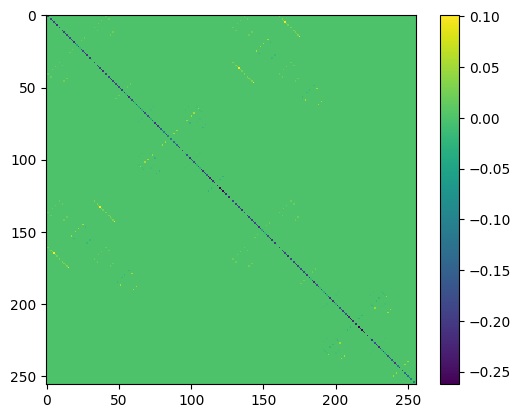

In [10]:
plt.imshow(np.real(R_ALA_ZZ), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [ ]:
###Saving the matrix in MATLAB format....




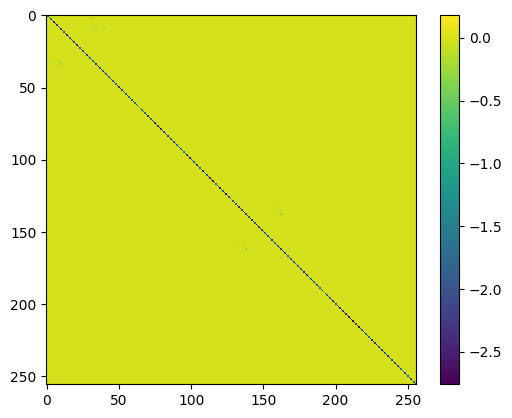

In [26]:
plt.imshow(np.real(R_ala.toarray()), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [27]:
np.linalg.norm(R_ala-R_ALA_ZZ)

30.87908480707723